In [1]:
import os
import chemprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
import shap

E:\Anaconda\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Function to generate MorganFP

In [2]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from tqdm import tqdm

def fp_list_from_smiles_list(smiles_list,n_bits=2048):                      
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        fp_list.append(fp_as_array(mol,n_bits))
    return fp_list


def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol,1, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)

    return arr



# SMILES to MorganFP

In [3]:
df = pd.read_csv('val_morgan_2048.csv')
df

,SMILES_acceptor,SMILES_donor
0,CCCCCCC1=CC=C(C2=C(/C=C3C(C4C(C=C(F)C(F)=C4)C\...,O=C(C(C(C(C1=C(C2=CC=C(C)S2)S3)=O)=C(S4)CC(CCC...
1,FC1=CC(C2=O)=C(C=C1F)C(/C2=C/C3=C(CCCCCCCCCCC)...,O=C(C(C(C(C1=C(C2=CC=C(C)S2)S3)=O)=C(S4)CC(CCC...
2,FC1=CC(C/2=C(C#N)/C#N)=C(C=C1F)C(C2=C/C3=C(CC(...,FC1=C(CC(CCCC)CC)SC(C2=C3C(SC(C4=C(F)C=C(C(C5=...
3,FC1=CC(C/2=C(C#N)/C#N)=C(C=C1F)C(C2=C/C3=C(CCC...,FC1=C(CC(CCCC)CC)SC(C2=C3C(SC(C4=C(F)C=C(C(C5=...
4,FC1=CC(C2=O)=C(C=C1F)C(/C2=C/C3=C(CC(CCCC)CCCC...,FC(C=C1C2=C3SC=CC3=C(C4=C2C=C(S4)C5=C(C=C(S5)C...
5,FC1=CC(C2=O)=C(C=C1F)C(/C2=C/C3=C(CC(CCCC)CCCC...,FC(C=C1C2=C3SC=CC3=C(C4=C2C=C(S4)C5=C(C=C(S5)C...
6,FC1=CC(C/2=C(C#N)/C#N)=C(C=C1F)C(C2=C/C3=C(CC(...,FC(C=C1C2=C3SC=CC3=C(C4=C2C=C(S4)C5=C(C=C(S5)C...
7,FC1=CC(C2=O)=C(C=C1F)C(/C2=C/C3=C(CCCCCCCCCCC)...,CC(SC1=C2C3=CC(F)=C(CC(CC)CCCC)S3)=CC1=C(C4=CC...
8,FC1=CC(C2=O)=C(C=C1F)C(/C2=C/C3=C(CCCCCCCCCCC)...,CC(SC1=C2C3=CC(F)=C(CC(CC)CCCC)S3)=CC1=C(C4=CC...
9,FC1=CC(C2=O)=C(C=C1F)C(/C2=C/C3=CC4=C(S3)C(SC(...,FC1=C(CC(CCCC)CC)SC(C2=C3C(SC(C4=C(F)C=C(C(C5=...


In [5]:
df = pd.read_csv('val_morgan_2048.csv')
donor_morgan_fp = fp_list_from_smiles_list(df['SMILES_donor'])
donor_morgan_fp_all = pd.DataFrame(donor_morgan_fp)
donor_morgan_fp_all = donor_morgan_fp_all.add_prefix('Donor_')
acceptor_morgan_fp = fp_list_from_smiles_list(df['SMILES_acceptor'])
acceptor_morgan_fp_all = pd.DataFrame(acceptor_morgan_fp)
acceptor_morgan_fp_all = acceptor_morgan_fp_all.add_prefix('Acceptor_')
frames_all = [donor_morgan_fp_all, acceptor_morgan_fp_all]
X_morgan = pd.concat(frames_all, axis =1)
X_morgan.to_csv('val_m_2048.csv')
X_morgan

  0%|                                                                                           | 0/25 [00:00<?, ?it/s]`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
100%|████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1082.23it/s]


,Donor_0,Donor_1,Donor_2,Donor_3,Donor_4,Donor_5,Donor_6,Donor_7,Donor_8,Donor_9,...,Acceptor_2038,Acceptor_2039,Acceptor_2040,Acceptor_2041,Acceptor_2042,Acceptor_2043,Acceptor_2044,Acceptor_2045,Acceptor_2046,Acceptor_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df = pd.read_csv('validation.csv')
donor_morgan_fp = fp_list_from_smiles_list(df['供体(SMILES)'])
donor_morgan_fp_all = pd.DataFrame(donor_morgan_fp)
donor_morgan_fp_all = donor_morgan_fp_all.add_prefix('Donor_')
acceptor_morgan_fp = fp_list_from_smiles_list(df['受体(SMILES)'])
acceptor_morgan_fp_all = pd.DataFrame(acceptor_morgan_fp)
acceptor_morgan_fp_all = acceptor_morgan_fp_all.add_prefix('Acceptor')
pce=df['PCE_max(%)']
frames_all = [donor_morgan_fp_all, acceptor_morgan_fp_all,pce]
X_morgan = pd.concat(frames_all, axis =1)
X_morgan.to_csv('1586_morgan_256.csv')
X_morgan

  0%|                                                                                         | 0/1586 [00:00<?, ?it/s]`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
100%|██████████████████████████████████████████████████████████████████████████████| 1586/1586 [00:26<00:00, 60.86it/s]


,Donor_0,Donor_1,Donor_2,Donor_3,Donor_4,Donor_5,Donor_6,Donor_7,Donor_8,Donor_9,...,Acceptor2039,Acceptor2040,Acceptor2041,Acceptor2042,Acceptor2043,Acceptor2044,Acceptor2045,Acceptor2046,Acceptor2047,PCE_max(%)
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.93
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.09
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.33
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8.67
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.16
1582,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.70
1583,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17.31
1584,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17.81


# 80% train set, 20% test set

In [18]:
df = pd.read_csv('data/RDKit_descriptor.csv')
df

,ID,PCE_max(%),Jsc(mA/cm2),FF,Voc(V),J4BalabanJ_acceptor,BertzCT_acceptor,Chi0_acceptor,Chi0n_acceptor,Chi0v_acceptor,...,fr_sulfonamd_donor,fr_sulfone_donor,fr_term_acetylene_donor,fr_tetrazole_donor,fr_thiazole_donor,fr_thiocyan_donor,fr_thiophene_donor,fr_unbrch_alkane_donor,fr_urea_donor,0
0,1,6.93,0.546891,0.011455,0.585714,0.323209,0.076852,0.121638,0.113001,0.118692,...,0,0,0,0,0.0,0,0.285714,0.000000,0,0
1,2,3.09,0.343866,0.006873,0.518095,0.323209,0.077613,0.121638,0.106752,0.112443,...,0,0,0,0,0.0,0,0.285714,0.000000,0,0
2,3,8.33,0.510924,0.018709,0.514286,0.277364,0.137919,0.181204,0.170521,0.181903,...,0,0,0,0,0.0,0,0.357143,0.166667,0,0
3,4,8.67,0.467899,0.014471,0.780952,0.313467,0.085175,0.149535,0.146302,0.169067,...,0,0,0,0,0.0,0,0.357143,0.555556,0,0
4,5,8.46,0.466218,0.015311,0.723810,0.277364,0.137919,0.181204,0.170521,0.181903,...,0,0,0,0,0.0,0,0.428571,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,1582,18.16,0.852101,0.021573,0.651429,0.325501,0.180397,0.241563,0.228762,0.251106,...,0,0,0,0,0.0,0,0.571429,0.000000,0,0
1582,1583,10.70,0.787563,0.015197,0.486667,0.362751,0.145736,0.185124,0.174598,0.185981,...,0,0,0,0,0.0,0,0.571429,0.000000,0,0
1583,1584,17.31,0.882017,0.020160,0.621905,0.378797,0.149803,0.192829,0.176808,0.188191,...,0,0,0,0,0.0,0,0.571429,0.000000,0,0
1584,1585,17.81,0.883025,0.022069,0.589524,0.365616,0.159061,0.230089,0.218944,0.240866,...,0,0,0,0,0.0,0,0.571429,0.000000,0,0


In [19]:
X = df.iloc[:, 5:]
Y = df.iloc[:,1]
print(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

0        6.93
1        3.09
2        8.33
3        8.67
4        8.46
        ...  
1581    18.16
1582    10.70
1583    17.31
1584    17.81
1585    18.77
Name: PCE_max(%), Length: 1586, dtype: float64


# model evaluation matrix

In [20]:

def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr
def RMSE(X,Y):
    rmse=np.sqrt(mean_squared_error(X,Y))
    return rmse
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from scipy.stats.stats import pearsonr

# Grid Search

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11],
    'subsample': [0.4,0.6,0.8, 1],
    'colsample_bytree': [0.1,0.2,0.4,0.6, 0.8, 1],
}

In [22]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
model = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
model.fit(X_train, y_train)
model.best_params_
dfresult=pd.DataFrame(model.cv_results_)
dfresult.to_csv('RDKit_XGBoost.csv')

Fitting 5 folds for each of 3024 candidates, totalling 15120 fits


In [23]:
model.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 100,
 'subsample': 0.6}

In [8]:
xgb_regressor=model.best_params_

# Model buliding

In [27]:
from xgboost import XGBRegressor
xgb_regressor=XGBRegressor(
colsample_bytree= 0.6,
learning_rate=0.05,
max_depth=7,
n_estimators=150,
subsample=0.6,
random_state = 1
)

In [25]:
model = xgb_regressor

In [26]:
xgb_regressor.fit(X_train, y_train)
y_train_hat = xgb_regressor.predict(X_train)
y_test_hat = xgb_regressor.predict(X_test)


# Plot

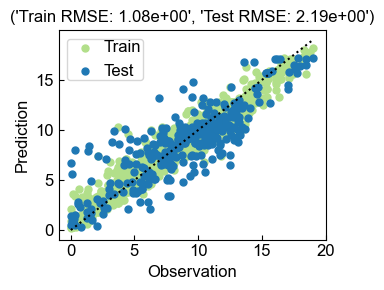

In [27]:
fontsize = 12
plt.figure(figsize=(3.5,3))
plt.style.use('default')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rcParams['font.family']="Arial"
a = plt.scatter(y_train, y_train_hat, s=25,c='#b2df8a')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=1.5)
plt.xlabel('Observation', fontsize=fontsize)
plt.ylabel('Prediction', fontsize=fontsize)
plt.tick_params(direction='in')
plt.title(('Train RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))),\
               'Test RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))), fontsize=fontsize)
b = plt.scatter(y_test, y_test_hat, s=25,c='#1f78b4')
plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
plt.rcParams['font.family']="Arial"
plt.tight_layout()
plt.show()


In [28]:
PearsonCoefficient(y_test,y_test_hat)

0.8478026558649375

In [29]:
R2Score(y_test,y_test_hat)

0.7162252820895962

# Save the model

In [30]:
import pickle
with open('model/RDKit_XGBoost.pkl', 'wb') as f:
    pickle.dump(xgb_regressor, f)

# SHAP

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


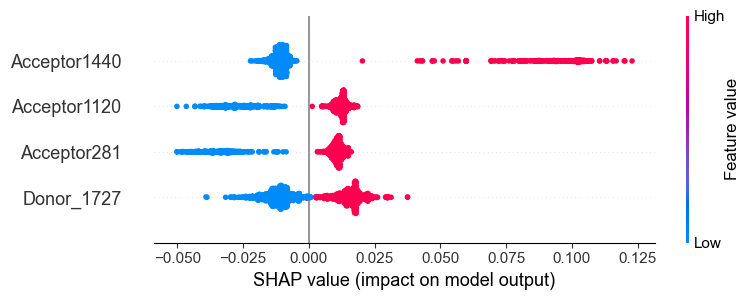

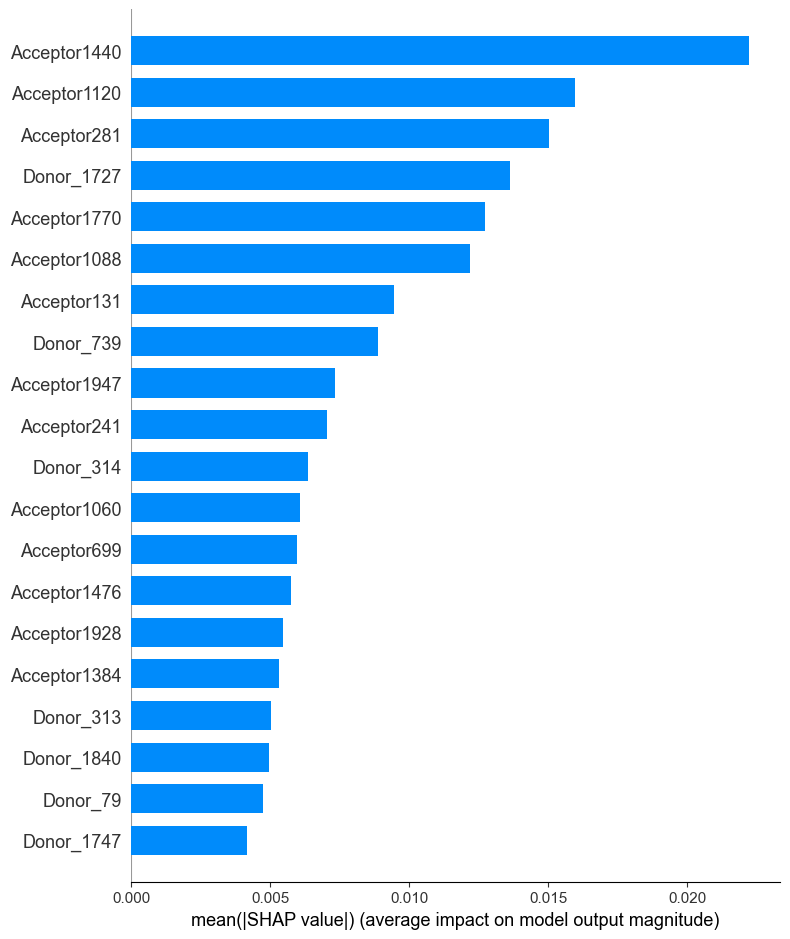

In [18]:
from sklearn import metrics
import shap
explainer = shap.TreeExplainer(model)
shap_explainer = explainer(X)
shap_values = explainer.shap_values(X)
shap_explainer.data=shap_explainer.data[0]
shap_explainer.values=shap_explainer.values[0]
shap.initjs()
shap.summary_plot(shap_values,X,max_display=4)
shap.summary_plot(shap_values,X, plot_type="bar")